>***Access GPU for fast processing***

Go to Runtime and then go to **"Change runtime type"** -> T4 GPU

In [1]:
#check

import os

if 'COLAB_GPU' in os.environ:
  print("GPU is enabled !")
else:
  print("GPU is not enabled !")

GPU is enabled !


> ***Install YOLO***

WE USE YOLOv8

1. Ultralytics Yolo (INSTALL) -> here , we don't need
  


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.7 MB/s eta 0:00:00


In [3]:
# check

import ultralytics

ultralytics.checks()

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/112.6 GB disk)


> ***Import Dataset: From Roboflow***

Store data into a specific directory


In [4]:
%pwd

'/content'

In [5]:
!mkdir RoadSignDetection

In [6]:
!ls


RoadSignDetection


In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="MW5HE7ZZxqr3eOxhqYbq")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 137.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.13.0.90
    Uninstalling opencv-python-headless-4.13.0.90:
      Successfully uninstalled opencv-python-headless-4.13.0.90
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Cars-6 in yolov8:: 100%|██████████| 9950/9950 [00:01<00:00, 9686.55it/s] 


In [2]:
os.chdir("/content/RoadSignDetection")

In [3]:
%pwd

'/content/RoadSignDetection'

In [4]:
!ls

Self-Driving-Cars-6


> ***Train the YOLOv8 over a Custom Dataset***

In [8]:
os.chdir("/content/RoadSignDetection/Self-Driving-Cars-6")

before running the below code snippet , paste the path of images file of test , train and valid in the data.yaml file

In [7]:
!yolo task=detect mode=train model=yolov8n.pt data='/content/RoadSignDetection/Self-Driving-Cars-6/data.yaml' epochs=10 imgsz=640 batch= 16

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/RoadSignDetection/Self-Driving-Cars-6/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True

>***Display some of the content we obtained***

In [9]:
!ls '/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train2/weights'

best.pt  last.pt


In [10]:
!ls '/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train2/'

args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg


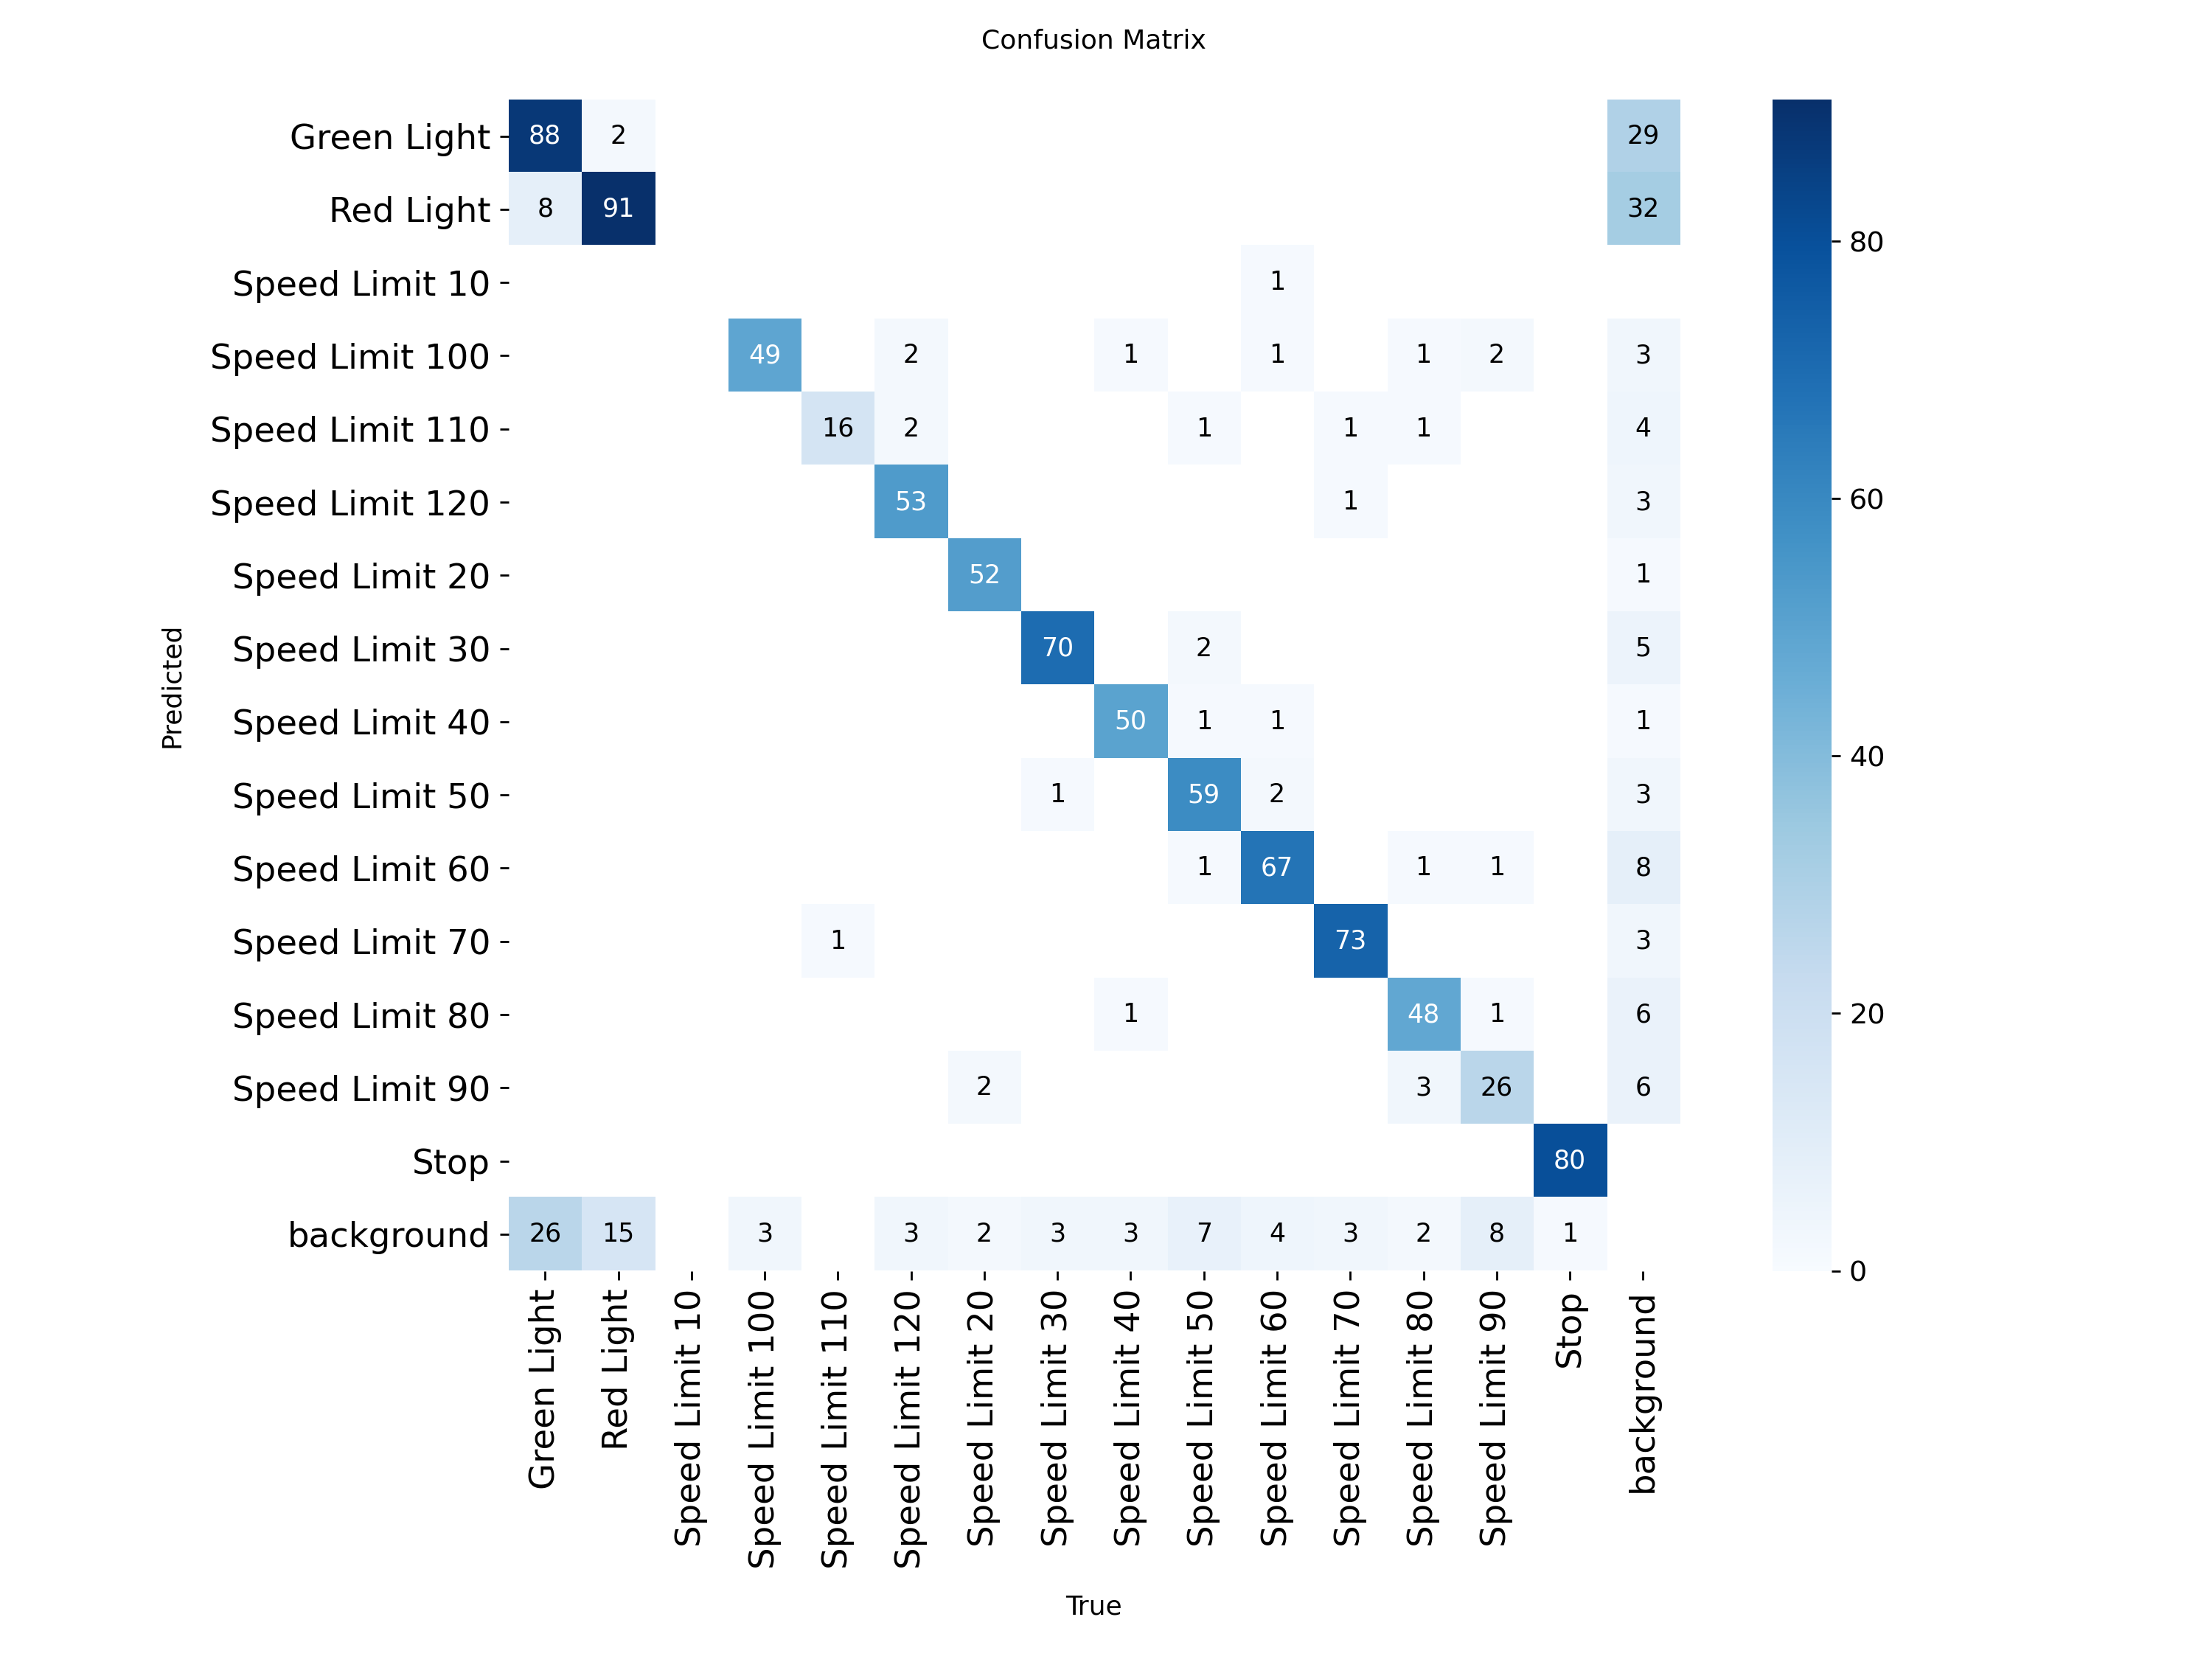

In [13]:
resultData = "/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train2/"

from IPython.display import Image , display

Image(filename = f'{resultData}confusion_matrix.png')

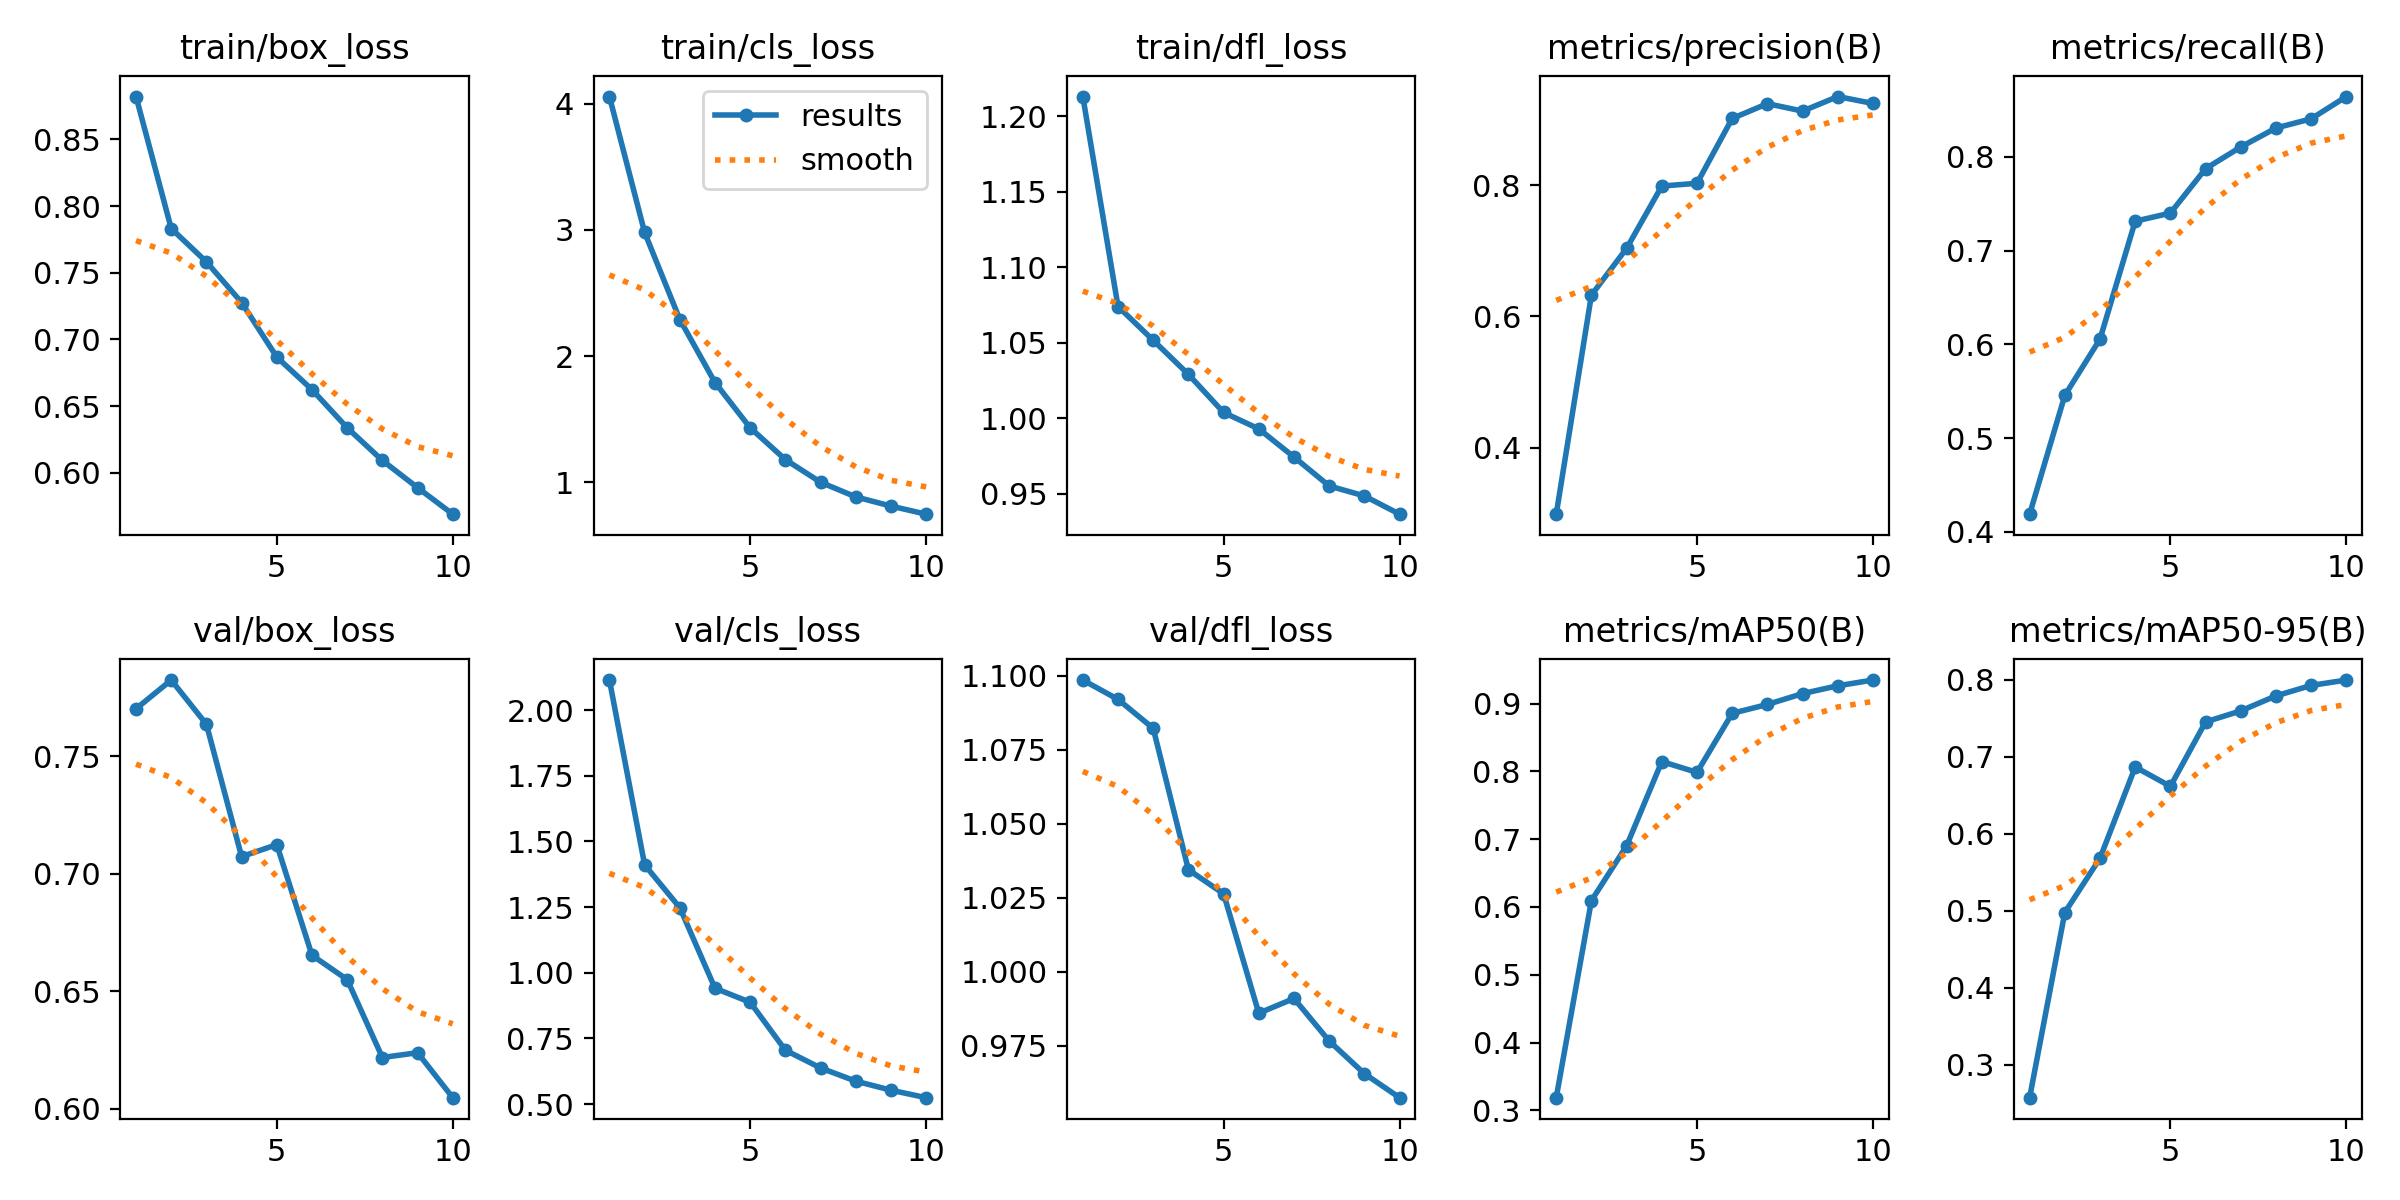

In [14]:
Image(filename = f'{resultData}results.png')

In [16]:
import pandas as pd

df = pd.read_csv(f'{resultData}results.csv')

print(df.head(5))

   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   64.3406         0.88215         4.05594         1.21306   
1      2  124.2030         0.78318         2.97945         1.07405   
2      3  182.5680         0.75817         2.28955         1.05168   
3      4  241.8110         0.72770         1.79029         1.02911   
4      5  299.6900         0.68675         1.43123         1.00388   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.29833            0.41878           0.31865   
1               0.63268            0.54556           0.60929   
2               0.70392            0.60559           0.69020   
3               0.79901            0.73140           0.81443   
4               0.80322            0.74005           0.79846   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.25691       0.77030       2.11456       1.09848  0.000175   
1              0.49764       0.78252  

In [18]:
print(df.tail(1))

   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
9     10  598.021         0.56896          0.7472         0.93655   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
9               0.92503            0.86441           0.93466   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
9              0.79987       0.60475       0.52428       0.95749  0.000057   

     lr/pg1    lr/pg2  
9  0.000057  0.000057  


> ***Test your model on any arbitrary image and video containg road signs***

In [19]:
%pwd

'/content/RoadSignDetection/Self-Driving-Cars-6'

In [20]:
os.chdir("/content")

In [21]:
%pwd

'/content'

In [22]:
#new folder for images and videos

!mkdir ManualTestingData

In [23]:
os.chdir("/content/ManualTestingData")

In [26]:
#download data from drive
#select the file ->share -> remove restrictions -> copy the share link
#copy the id from the share link and paste them into -> this syntax :
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1PADc1WuMU9xiOQWdSmENvpy8L6v6tBHY' -O inputVideo1.mp4


URL= "https://drive.google.com/file/d/1PADc1WuMU9xiOQWdSmENvpy8L6v6tBHY/view?usp=sharing"

id ='1PADc1WuMU9xiOQWdSmENvpy8L6v6tBHY'

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1PADc1WuMU9xiOQWdSmENvpy8L6v6tBHY' -O inputVideo1.mp4





--2026-02-10 07:42:55--  https://docs.google.com/uc?export=download&id=1PADc1WuMU9xiOQWdSmENvpy8L6v6tBHY
Resolving docs.google.com (docs.google.com)... 173.194.203.102, 173.194.203.139, 173.194.203.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.203.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1PADc1WuMU9xiOQWdSmENvpy8L6v6tBHY&export=download [following]
--2026-02-10 07:42:56--  https://drive.usercontent.google.com/download?id=1PADc1WuMU9xiOQWdSmENvpy8L6v6tBHY&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.135.132, 2607:f8b0:400e:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.135.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50488935 (48M) [video/mp4]
Saving to: ‘inputVideo1.mp4’

inputVideo1.mp4     100%[===================>]  48.15M  50.5MB/s    in 1.0s    

In [28]:
weightsPath = "/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train2/weights"

!yolo task=detect mode=predict model= {weightsPath}/best.pt conf=0.25 source= 'inputVideo1.mp4' save=True

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/473) /content/ManualTestingData/inputVideo1.mp4: 384x640 (no detections), 42.5ms
video 1/1 (frame 2/473) /content/ManualTestingData/inputVideo1.mp4: 384x640 (no detections), 9.4ms
video 1/1 (frame 3/473) /content/ManualTestingData/inputVideo1.mp4: 384x640 (no detections), 8.7ms
video 1/1 (frame 4/473) /content/ManualTestingData/inputVideo1.mp4: 384x640 (no detections), 9.1ms
video 1/1 (frame 5/473) /content/ManualTestingData/inputVideo1.mp4: 384x640 (no detections), 9.0ms
video 1/1 (frame 6/473) /content/ManualTestingData/inputVideo1.mp4: 384x640 (no detections), 8.8ms
video 1/1 (frame 7/473) /content/ManualTestingData/inputVideo1.mp4: 384x640 (no detections), 12.1ms
video 1/1 (frame 8/473) /content/ManualTestingData/inputVideo1.mp4: 384x640 (no detections), 9.0ms
video 1/1 (frame 9/473) /content/ManualTest

In [29]:
 #download other folders as well


URL= "https://drive.google.com/file/d/18OicAhwAWyexzPsOTmogTsWOpjYiW7nq/view?usp=sharing"

id ='18OicAhwAWyexzPsOTmogTsWOpjYiW7nq'

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=18OicAhwAWyexzPsOTmogTsWOpjYiW7nq' -O inputImage1.jpg

--2026-02-10 07:52:17--  https://docs.google.com/uc?export=download&id=18OicAhwAWyexzPsOTmogTsWOpjYiW7nq
Resolving docs.google.com (docs.google.com)... 108.177.98.113, 108.177.98.101, 108.177.98.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.98.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=18OicAhwAWyexzPsOTmogTsWOpjYiW7nq&export=download [following]
--2026-02-10 07:52:17--  https://drive.usercontent.google.com/download?id=18OicAhwAWyexzPsOTmogTsWOpjYiW7nq&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.117.132, 2607:f8b0:400e:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.117.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124669 (122K) [image/jpeg]
Saving to: ‘inputImage1.jpg’

inputImage1.jpg     100%[===================>] 121.75K  --.-KB/s    in 0.001s  



In [32]:
weightsPath = "/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train2/weights"

!yolo task=detect mode=predict model= {weightsPath}/best.pt conf=0.25 source= 'inputImage1.jpg' save=True

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/ManualTestingData/inputImage1.jpg: 480x640 1 Stop, 41.7ms
Speed: 3.0ms preprocess, 41.7ms inference, 15.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/ManualTestingData/runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [30]:
 #download other folders as well


URL= "https://drive.google.com/file/d/1L8KgkM6FG6sUhqeZ7aRYjCmPKQnFCM16/view?usp=sharing"

id ='1L8KgkM6FG6sUhqeZ7aRYjCmPKQnFCM16'

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1L8KgkM6FG6sUhqeZ7aRYjCmPKQnFCM16' -O TwoTrafficLightImage.jpg

--2026-02-10 07:54:26--  https://docs.google.com/uc?export=download&id=1L8KgkM6FG6sUhqeZ7aRYjCmPKQnFCM16
Resolving docs.google.com (docs.google.com)... 142.250.107.113, 142.250.107.138, 142.250.107.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.107.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1L8KgkM6FG6sUhqeZ7aRYjCmPKQnFCM16&export=download [following]
--2026-02-10 07:54:26--  https://drive.usercontent.google.com/download?id=1L8KgkM6FG6sUhqeZ7aRYjCmPKQnFCM16&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.135.132, 2607:f8b0:400e:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.135.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168372 (164K) [image/jpeg]
Saving to: ‘TwoTrafficLightImage.jpg’

TwoTrafficLightImag 100%[===================>] 164.43K  --.-KB/s    in

In [33]:
weightsPath = "/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train2/weights"

!yolo task=detect mode=predict model= {weightsPath}/best.pt conf=0.25 source= 'TwoTrafficLightImage.jpg' save=True

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/ManualTestingData/TwoTrafficLightImage.jpg: 640x640 1 Red Light, 8.2ms
Speed: 4.0ms preprocess, 8.2ms inference, 14.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/ManualTestingData/runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [31]:
URL = "https://drive.google.com/file/d/1To6ev-ycixwvkfkYbvE9272OpYVcnm32/view?usp=sharing"

id ='1To6ev-ycixwvkfkYbvE9272OpYVcnm32'

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1To6ev-ycixwvkfkYbvE9272OpYVcnm32' -O DiffImage.jpg

--2026-02-10 07:55:50--  https://docs.google.com/uc?export=download&id=1To6ev-ycixwvkfkYbvE9272OpYVcnm32
Resolving docs.google.com (docs.google.com)... 74.125.135.102, 74.125.135.139, 74.125.135.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.135.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1To6ev-ycixwvkfkYbvE9272OpYVcnm32&export=download [following]
--2026-02-10 07:55:50--  https://drive.usercontent.google.com/download?id=1To6ev-ycixwvkfkYbvE9272OpYVcnm32&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.117.132, 2607:f8b0:400e:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.117.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9325 (9.1K) [image/jpeg]
Saving to: ‘DiffImage.jpg’

DiffImage.jpg       100%[===================>]   9.11K  --.-KB/s    in 0s      

2026

In [34]:
weightsPath = "/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train2/weights"

!yolo task=detect mode=predict model= {weightsPath}/best.pt conf=0.25 source= 'DiffImage.jpg' save=True

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/ManualTestingData/DiffImage.jpg: 448x640 (no detections), 44.7ms
Speed: 3.9ms preprocess, 44.7ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/ManualTestingData/runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [35]:
URL = "https://drive.google.com/file/d/1gBy6e9ifl1HEUElTDDmXIjdPPsUgge3S/view?usp=sharing"

id ='1gBy6e9ifl1HEUElTDDmXIjdPPsUgge3S'

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1gBy6e9ifl1HEUElTDDmXIjdPPsUgge3S' -O 50SpeedLimit.mp4

--2026-02-10 07:59:15--  https://docs.google.com/uc?export=download&id=1gBy6e9ifl1HEUElTDDmXIjdPPsUgge3S
Resolving docs.google.com (docs.google.com)... 74.125.142.100, 74.125.142.138, 74.125.142.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1gBy6e9ifl1HEUElTDDmXIjdPPsUgge3S&export=download [following]
--2026-02-10 07:59:16--  https://drive.usercontent.google.com/download?id=1gBy6e9ifl1HEUElTDDmXIjdPPsUgge3S&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.195.132, 2607:f8b0:400e:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.195.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54304435 (52M) [video/mp4]
Saving to: ‘50SpeedLimit.mp4’

50SpeedLimit.mp4    100%[===================>]  51.79M   171MB/s    in 0.3s    

2

In [36]:
weightsPath = "/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train2/weights"

!yolo task=detect mode=predict model= {weightsPath}/best.pt conf=0.25 source= '50SpeedLimit.mp4' save=True

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/527) /content/ManualTestingData/50SpeedLimit.mp4: 384x640 2 Red Lights, 42.3ms
video 1/1 (frame 2/527) /content/ManualTestingData/50SpeedLimit.mp4: 384x640 2 Red Lights, 9.4ms
video 1/1 (frame 3/527) /content/ManualTestingData/50SpeedLimit.mp4: 384x640 1 Red Light, 8.8ms
video 1/1 (frame 4/527) /content/ManualTestingData/50SpeedLimit.mp4: 384x640 1 Red Light, 9.2ms
video 1/1 (frame 5/527) /content/ManualTestingData/50SpeedLimit.mp4: 384x640 1 Red Light, 9.3ms
video 1/1 (frame 6/527) /content/ManualTestingData/50SpeedLimit.mp4: 384x640 1 Red Light, 10.6ms
video 1/1 (frame 7/527) /content/ManualTestingData/50SpeedLimit.mp4: 384x640 1 Red Light, 9.0ms
video 1/1 (frame 8/527) /content/ManualTestingData/50SpeedLimit.mp4: 384x640 1 Red Light, 9.2ms
video 1/1 (frame 9/527) /content/ManualTestingData/50SpeedLimit.m

In [38]:
URL ="https://drive.google.com/file/d/193q1RHqwJK4ueL48qosW1ZHpD8AunqPI/view?usp=sharing"

id = '193q1RHqwJK4ueL48qosW1ZHpD8AunqPI'

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=193q1RHqwJK4ueL48qosW1ZHpD8AunqPI' -O Traffic.mp4

--2026-02-10 08:02:41--  https://docs.google.com/uc?export=download&id=193q1RHqwJK4ueL48qosW1ZHpD8AunqPI
Resolving docs.google.com (docs.google.com)... 74.125.20.102, 74.125.20.113, 74.125.20.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=193q1RHqwJK4ueL48qosW1ZHpD8AunqPI&export=download [following]
--2026-02-10 08:02:41--  https://drive.usercontent.google.com/download?id=193q1RHqwJK4ueL48qosW1ZHpD8AunqPI&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.135.132, 2607:f8b0:400e:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.135.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51094535 (49M) [video/mp4]
Saving to: ‘Traffic.mp4’

Traffic.mp4         100%[===================>]  48.73M   159MB/s    in 0.3s    

2026-02-10

In [39]:
weightsPath = "/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train2/weights"

!yolo task=detect mode=predict model= {weightsPath}/best.pt conf=0.25 source= 'Traffic.mp4' save=True

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/609) /content/ManualTestingData/Traffic.mp4: 384x640 (no detections), 72.8ms
video 1/1 (frame 2/609) /content/ManualTestingData/Traffic.mp4: 384x640 (no detections), 12.5ms
video 1/1 (frame 3/609) /content/ManualTestingData/Traffic.mp4: 384x640 (no detections), 11.2ms
video 1/1 (frame 4/609) /content/ManualTestingData/Traffic.mp4: 384x640 (no detections), 16.2ms
video 1/1 (frame 5/609) /content/ManualTestingData/Traffic.mp4: 384x640 (no detections), 15.8ms
video 1/1 (frame 6/609) /content/ManualTestingData/Traffic.mp4: 384x640 1 Red Light, 15.4ms
video 1/1 (frame 7/609) /content/ManualTestingData/Traffic.mp4: 384x640 (no detections), 10.4ms
video 1/1 (frame 8/609) /content/ManualTestingData/Traffic.mp4: 384x640 (no detections), 8.5ms
video 1/1 (frame 9/609) /content/ManualTestingData/Traffic.mp4: 384x640 (n

In [40]:
URL ="https://drive.google.com/file/d/1D6ZoPchhkmD8He2ezYvH-G6wjSw_f-w7/view?usp=sharing"

id = '1D6ZoPchhkmD8He2ezYvH-G6wjSw_f-w7'

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1D6ZoPchhkmD8He2ezYvH-G6wjSw_f-w7' -O TrafficGreen.jpg

--2026-02-10 08:04:45--  https://docs.google.com/uc?export=download&id=1D6ZoPchhkmD8He2ezYvH-G6wjSw_f-w7
Resolving docs.google.com (docs.google.com)... 74.125.195.138, 74.125.195.101, 74.125.195.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1D6ZoPchhkmD8He2ezYvH-G6wjSw_f-w7&export=download [following]
--2026-02-10 08:04:45--  https://drive.usercontent.google.com/download?id=1D6ZoPchhkmD8He2ezYvH-G6wjSw_f-w7&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.135.132, 2607:f8b0:400e:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.135.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30365 (30K) [image/jpeg]
Saving to: ‘TrafficGreen.jpg’

TrafficGreen.jpg    100%[===================>]  29.65K  --.-KB/s    in 0s      

202

In [41]:
weightsPath = "/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train2/weights"

!yolo task=detect mode=predict model= {weightsPath}/best.pt conf=0.25 source= 'TrafficGreen.jpg' save=True

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/ManualTestingData/TrafficGreen.jpg: 384x640 1 Green Light, 1 Red Light, 45.5ms
Speed: 3.1ms preprocess, 45.5ms inference, 16.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/ManualTestingData/runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


> ***Download the result of the prediction***

In [46]:
from google.colab import files

files.download('/content/ManualTestingData/runs/detect/predict/inputVideo1.avi')
files.download('/content/ManualTestingData/runs/detect/predict3/inputImage1.jpg')
files.download('/content/ManualTestingData/runs/detect/predict4/TwoTrafficLightImage.jpg')
files.download('/content/ManualTestingData/runs/detect/predict5/DiffImage.jpg')
files.download('/content/ManualTestingData/runs/detect/predict6/50SpeedLimit.avi')
files.download('/content/ManualTestingData/runs/detect/predict7/Traffic.avi')
files.download('/content/ManualTestingData/runs/detect/predict8/TrafficGreen.jpg')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>